In [1]:
#Tensorflow DNN model alpha design
import tensorflow as tf
from tensorflow import keras
from datetime import datetime
import pandas as pd
import numpy as np
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

filename = (r'E:\Tensorflow\finalyr_project\models\label.csv')
df = pd.read_csv(filename,  parse_dates=['Timestamp'],index_col='Timestamp')

%config inlineBackend.figure_format='retina'

#x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=42)
df.head()

,Car_count,compare_left,compare_opp,compare_right,Train_Prediction,count_and_pred,minute,hour,day_of_week,day_of_month,month,Decision
Timestamp,,,,,,,,,,,,
2020-09-23 00:00:00,2,0,0,-1,0.000000,0,0,0,2,23,9,0
2020-09-23 00:01:00,2,0,0,-1,2.214917,1,1,0,2,23,9,0
2020-09-23 00:02:00,2,0,-1,-1,2.214917,1,2,0,2,23,9,1
2020-09-23 00:03:00,3,-1,-1,-1,2.214917,0,3,0,2,23,9,5
2020-09-23 00:04:00,3,0,-1,-1,3.873900,1,4,0,2,23,9,1


In [2]:
df = shuffle(df)

In [3]:
train , test = train_test_split(df.iloc[:,0:12], test_size=0.25)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:11], df['Decision'],test_size=0.25)

In [4]:
columns = df.columns[0:12]
print(columns)

Index(['Car_count', 'compare_left', 'compare_opp', 'compare_right',
       'Train_Prediction', 'count_and_pred', 'minute', 'hour', 'day_of_week',
       'day_of_month', 'month', 'Decision'],
      dtype='object')


In [5]:
# df['minute'] = df.index.minute
# df['hour'] = df.index.hour
# df['day_of_week'] = df.index.dayofweek
# df['day_of_month'] = df.index.day
# df['month'] = df.index.month
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((64800, 11), (21601, 11), (64800,), (21601,))

In [6]:
df.tail()

,Car_count,compare_left,compare_opp,compare_right,Train_Prediction,count_and_pred,minute,hour,day_of_week,day_of_month,month,Decision
Timestamp,,,,,,,,,,,,
2020-10-27 21:13:00,22,-1,0,0,17.773001,0,13,21,1,27,10,4
2020-03-11 11:40:00,9,-1,-1,0,6.740071,0,40,11,2,11,3,3
2020-09-25 19:29:00,32,-1,0,-1,26.443317,0,29,19,4,25,9,4
2020-03-10 05:31:00,18,0,0,0,17.773001,0,31,5,1,10,3,5
2020-08-10 18:35:00,28,-1,0,-1,22.778927,0,35,18,0,10,8,4


In [7]:
# ID_COL, TARGET_COL = 'ID', 'Decision'

# features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]

# cat_cols = ['Car_count','compare_left', 'compare_opp', 'compare_right',
#            'Train_Prediction', 'count_and_pred', 'minute', 'hour','day_of_week', 'day_of_month',
#            'month']
# num_cols = [c for c in features if c not in cat_cols]

# def join_df(train, test):

#   df = pd.concat([train, test], axis=0).reset_index(drop = True)
#   features = [c for c in df.columns if c not in [ID_COL, TARGET_COL]]

#   return df, features

# def split_df_and_get_features(df, train_nrows):

#   train, test = df[:train_nrows].reset_index(drop = True), df[train_nrows:].reset_index(drop = True)
#   features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]
  
#   return train, test, features

# cat_cols
# n_folds = 5
# from sklearn.metrics import make_scorer
# from sklearn.model_selection import KFold
# scorer = make_scorer(mean_squared_error,greater_is_better = False)
# def rmse_CV_train(model):
#     kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
#     rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
#     return (rmse)
# def rmse_CV_test(model):
#     kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
#     rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
#     return (rmse)

In [8]:
# df, features = join_df(train, test)

In [9]:
df.select_dtypes('object').columns.tolist()

[]

In [9]:
# df, features = join_df(train, test)

# ### Label Encoding
# df[cat_cols] = df[cat_cols].apply(lambda x: pd.factorize(x)[0])

# #### No NaN filling required.

In [10]:
df = df.fillna(df.mean())
df.isnull().sum().sum()

0

In [9]:
X_train.describe()

,Car_count,compare_left,compare_opp,compare_right,Train_Prediction,count_and_pred,minute,hour,day_of_week,day_of_month,month
count,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000,64800.000000
mean,15.280617,-0.500417,-0.505340,-0.498071,15.093495,0.539306,29.362685,11.440139,3.050448,17.300031,8.636836
std,6.205466,0.500004,0.499975,0.500000,4.237356,0.498457,17.355825,6.929201,1.902182,6.910783,2.828751
min,2.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
25%,11.000000,-1.000000,-1.000000,-1.000000,12.583513,0.000000,14.000000,5.000000,1.000000,11.000000,8.000000
50%,15.000000,-1.000000,-1.000000,0.000000,15.328584,1.000000,29.000000,11.000000,3.000000,16.000000,10.000000
75%,19.000000,0.000000,0.000000,0.000000,17.773001,1.000000,44.000000,17.000000,5.000000,23.000000,10.000000
max,40.000000,0.000000,0.000000,0.000000,29.027714,1.000000,59.000000,23.000000,6.000000,31.000000,12.000000


In [10]:
X_train.head(5)

,Car_count,compare_left,compare_opp,compare_right,Train_Prediction,count_and_pred,minute,hour,day_of_week,day_of_month,month
Timestamp,,,,,,,,,,,
2020-10-19 20:16:00,12,0,-1,-1,14.681608,1,16,20,0,19,10
2020-09-11 19:20:00,20,-1,0,0,18.358158,0,20,19,4,11,9
2020-09-29 06:28:00,12,0,0,-1,12.583513,1,28,6,1,29,9
2020-10-11 20:02:00,9,-1,-1,0,10.968506,1,2,20,6,11,10
2020-07-11 03:40:00,16,0,0,0,15.958396,0,40,3,5,11,7


In [11]:
X_test.head(5)

,Car_count,compare_left,compare_opp,compare_right,Train_Prediction,count_and_pred,minute,hour,day_of_week,day_of_month,month
Timestamp,,,,,,,,,,,
2020-10-10 07:47:00,22,-1,0,0,17.178720,0,47,7,5,10,10
2020-10-20 13:46:00,12,-1,-1,-1,15.328584,1,46,13,1,20,10
2020-09-10 07:24:00,11,0,0,-1,11.804979,1,24,7,3,10,9
2020-02-10 00:10:00,5,0,-1,-1,6.740071,1,10,0,0,10,2
2020-10-29 14:15:00,21,-1,-1,0,17.178720,0,15,14,3,29,10


In [12]:
y_train.head(5)

Timestamp
2020-10-19 20:16:00    1
2020-09-11 19:20:00    4
2020-09-29 06:28:00    0
2020-10-11 20:02:00    3
2020-07-11 03:40:00    5
Name: Decision, dtype: int64

In [13]:
y_test.head(5)

Timestamp
2020-10-10 07:47:00    4
2020-10-20 13:46:00    5
2020-09-10 07:24:00    0
2020-02-10 00:10:00    1
2020-10-29 14:15:00    3
Name: Decision, dtype: int64

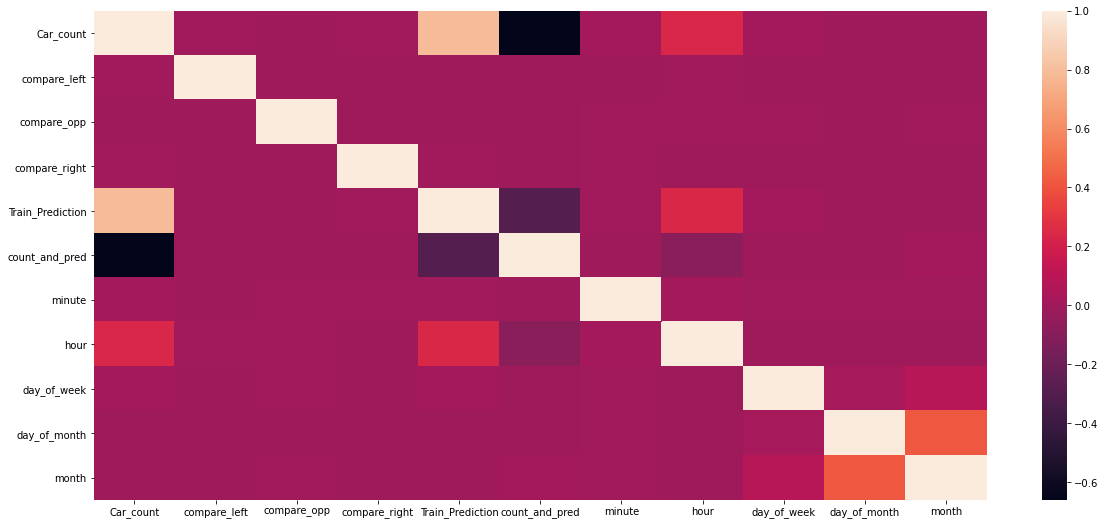

In [14]:
corrmat = X_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat)
plt.savefig('confusion_matrix.png', bbox_inches='tight')

D:\anaconda\envs\tfenv\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\anaconda\envs\tfenv\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\anaconda\envs\tfenv\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\anaconda\envs\tfenv\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\anaconda\envs\tfenv\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\anaconda\envs\tfenv\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have v

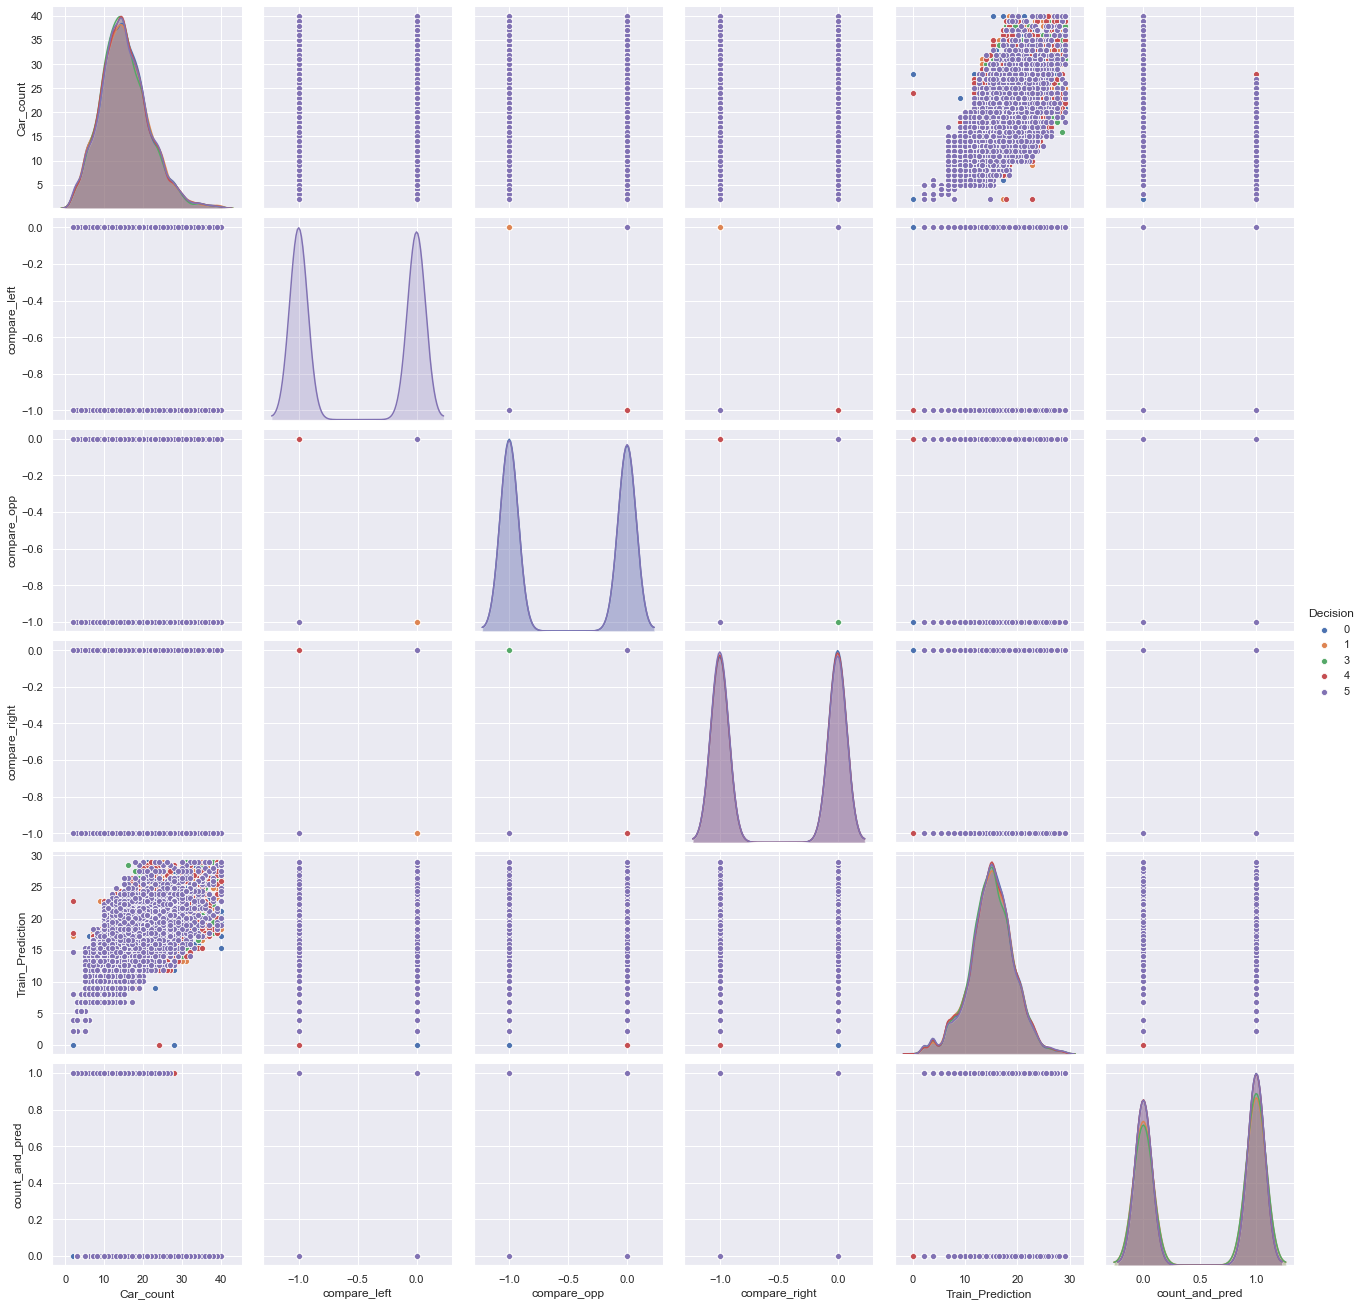

In [15]:
sns.set()
cols = ['Car_count','compare_left', 'compare_opp', 'compare_right',
           'Train_Prediction', 'count_and_pred', 'Decision']
sns_plot = sns.pairplot(train[cols],hue = 'Decision', height = 3)
sns_plot.savefig('cols.png')

In [16]:
#train_proc, test_proc, features = split_df_and_get_features(df, train.shape[0])

In [18]:
from keras.models import Sequential 
from keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler

input_dim = len(df.columns) - 1

%matplotlib inline

def scheduler(epoch):
    if epoch < 10:
        return 0.0001
    else:
        return 0.0001 * tf.math.exp(0.1 * (10 - epoch))


# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(256, activation='relu',input_dim = input_dim),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dropout(0.25),
#     tf.keras.layers.Dense(6,activation='softmax')
# ])

model = Sequential()
model.add(Dense(256, input_dim = input_dim , activation = 'relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph/DNN', histogram_freq=0, write_graph=True, write_images=True)
lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(X_train, y_train, epochs=30,batch_size = 32, callbacks=[lr_callback, tbCallBack], validation_data=(X_test, y_test), validation_steps = 8)

model.summary()



Epoch 1/30
2025/2025 [==============================] - 5s 3ms/step - loss: 1.7003 - accuracy: 0.2375 - val_loss: 1.6044 - val_accuracy: 0.2344
Epoch 2/30
2025/2025 [==============================] - 3s 2ms/step - loss: 1.4823 - accuracy: 0.3244 - val_loss: 0.7934 - val_accuracy: 0.7383
Epoch 3/30
2025/2025 [==============================] - 3s 2ms/step - loss: 0.6954 - accuracy: 0.6949 - val_loss: 0.1940 - val_accuracy: 0.9805
Epoch 4/30
2025/2025 [==============================] - 4s 2ms/step - loss: 0.3202 - accuracy: 0.8796 - val_loss: 0.0213 - val_accuracy: 1.0000
Epoch 5/30
2025/2025 [==============================] - 3s 2ms/step - loss: 0.1508 - accuracy: 0.9511 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 6/30
2025/2025 [==============================] - 4s 2ms/step - loss: 0.0854 - accuracy: 0.9742 - val_loss: 9.4978e-04 - val_accuracy: 1.0000
Epoch 7/30
2025/2025 [==============================] - 3s 2ms/step - loss: 0.0628 - accuracy: 0.9814 - val_loss: 7.4117e-04 - val_a

KeyboardInterrupt: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


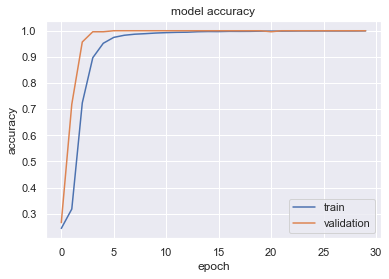

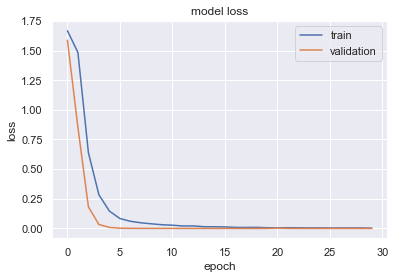

In [32]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.savefig('DNN_acc.png')
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.savefig('DNN_loss.png')
plt.show()


In [33]:
model.save('DNNmodel_final')


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: DNNmodel_final\assets


In [ ]:
from img_recog import api
from api import object_counting_api

def DeepModel():
    model = tf.keras.models.load_model('DLV4dot3.h5')
    input_value = object_counting_api.total_passed_objects()
    classes=(model.predict(images, batch_size=16))
    print(classes)
    if classes = 0:
        print("Right")
    elif classes = 1:
        print("right&straight")
    elif classes = 2:
        print("straight")
    elif classes = 3:
        print("left&straight")
    elif classes = 4:
        print("left")
    else classes = 5:
        print("No change")